In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# EDA

In [4]:
# eda = pp.ProfileReport(df)
# eda.to_file('EDA.html')

For EDA, please refer to the html file.

In [5]:
df.drop(columns=['veil-type'], axis=1, inplace=True)

Now lets compare the features with our target.

C:\Users\Nikhil Hariharan\AppData\Local\Temp\ipykernel_16232\3826816445.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,20))


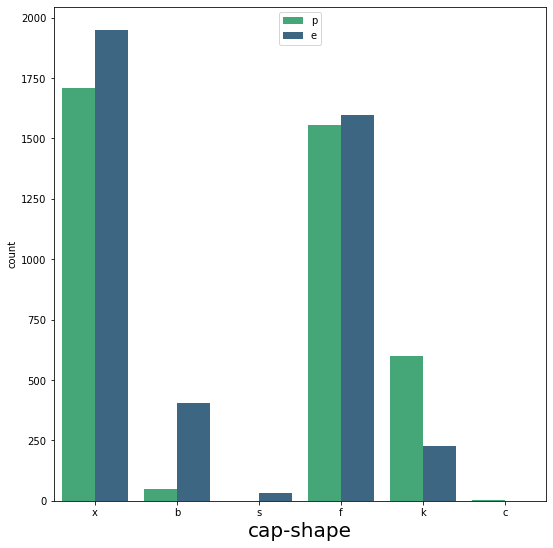

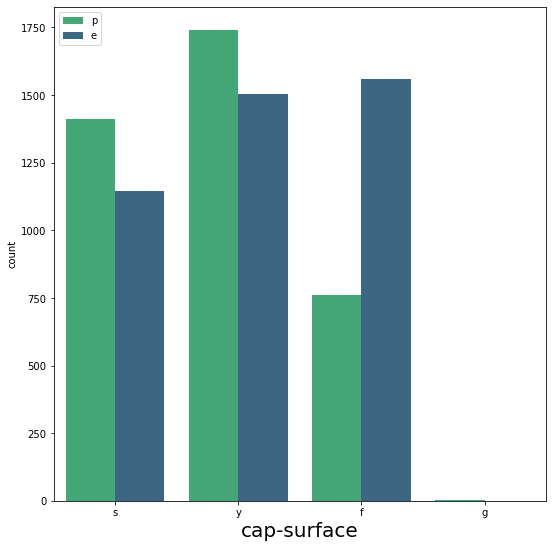

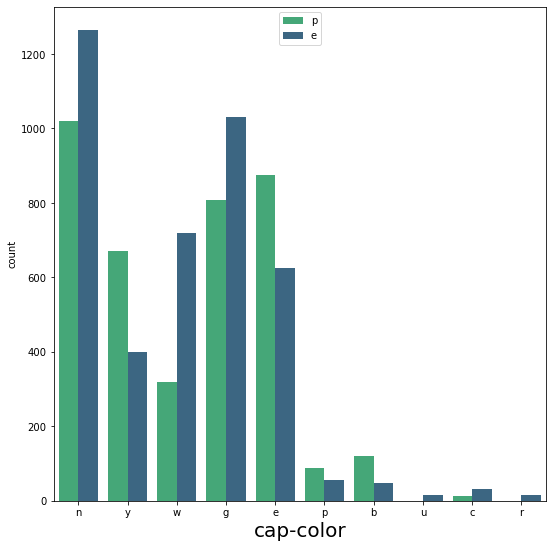

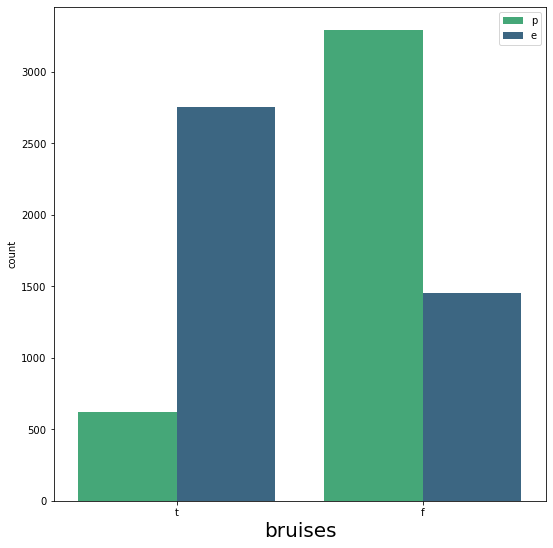

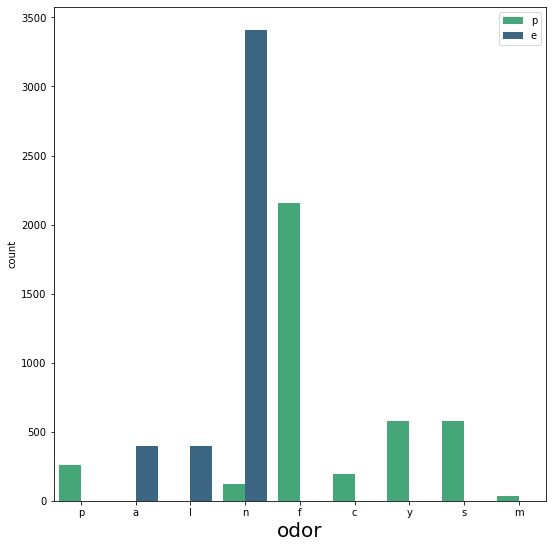

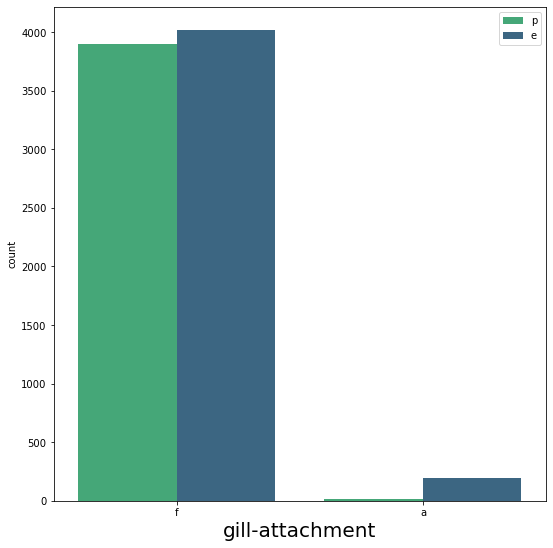

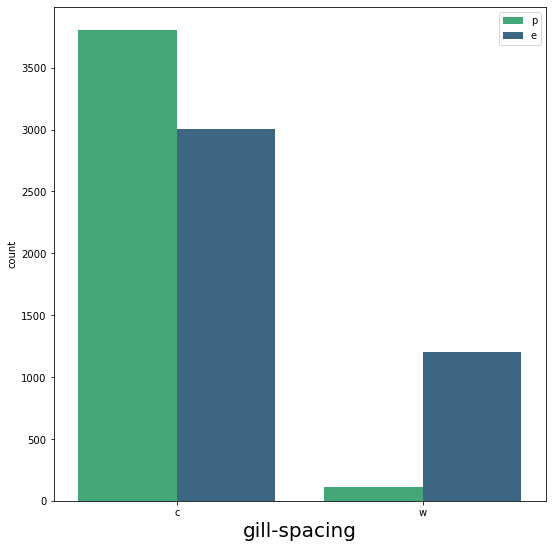

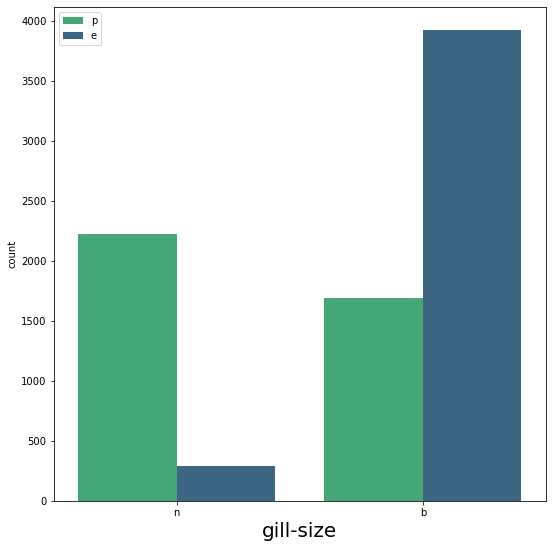

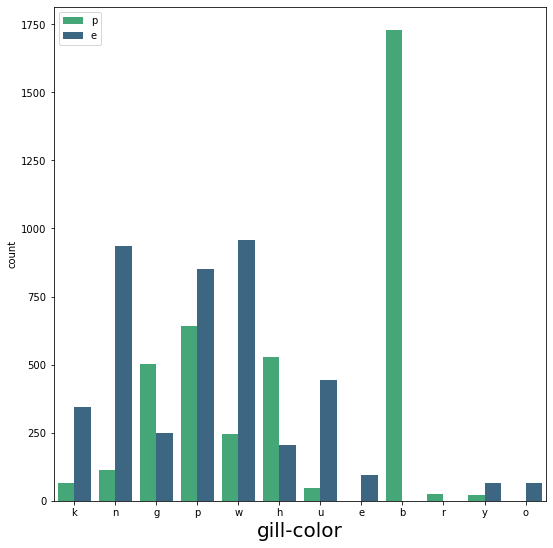

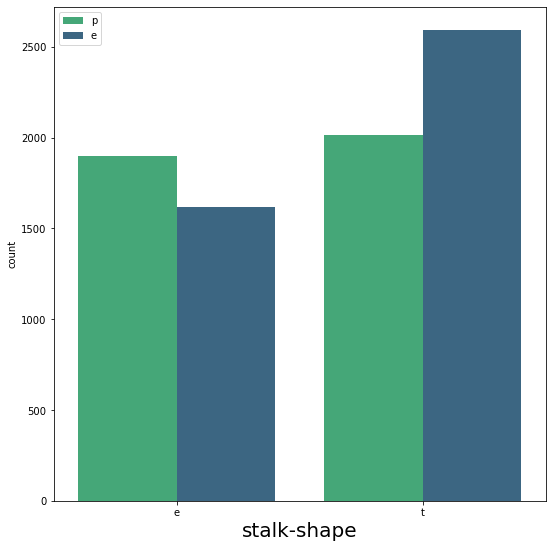

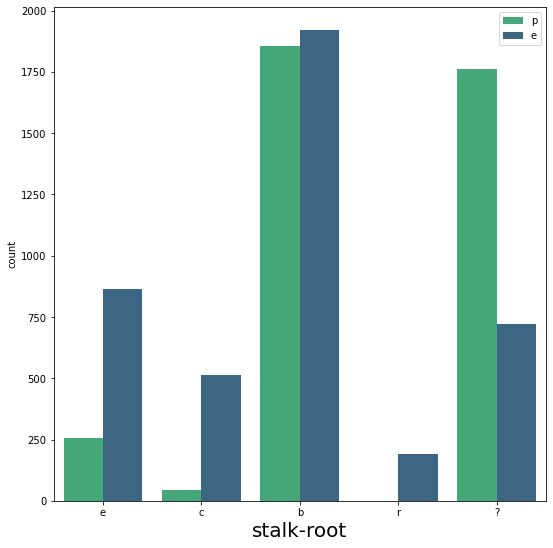

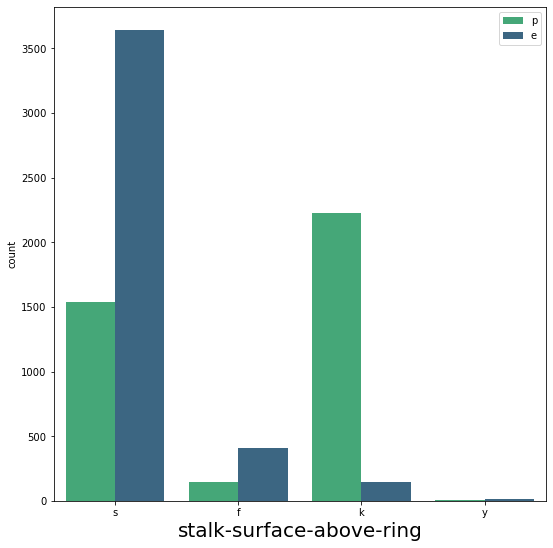

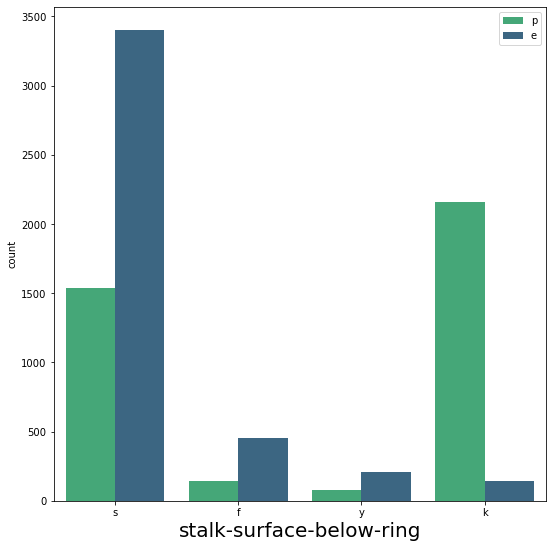

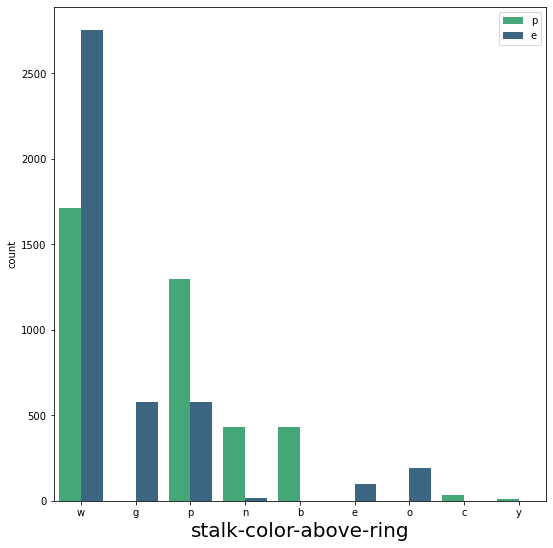

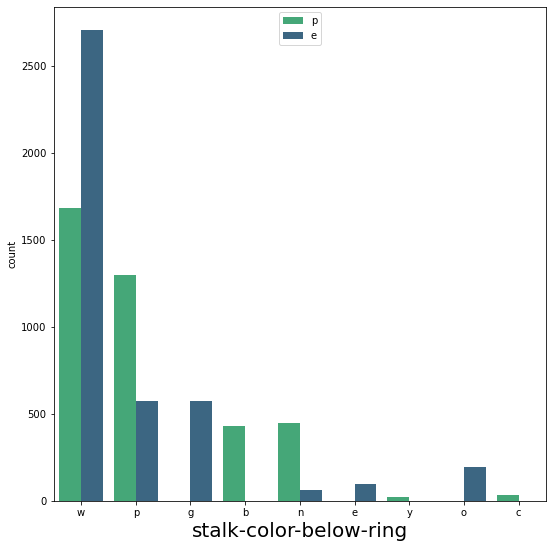

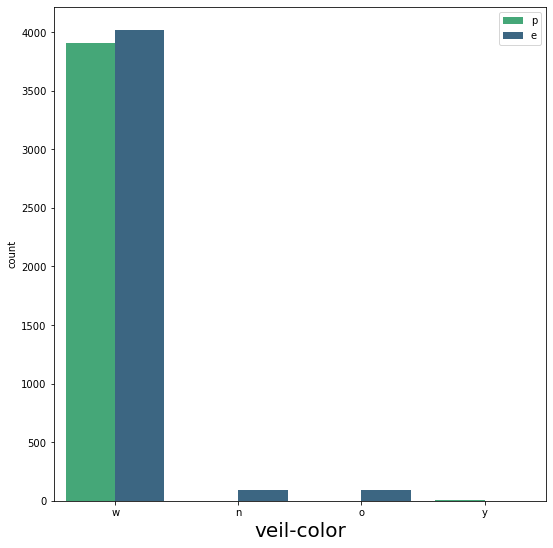

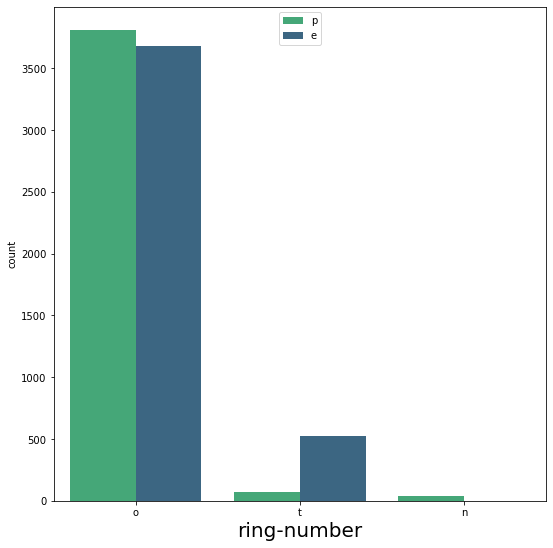

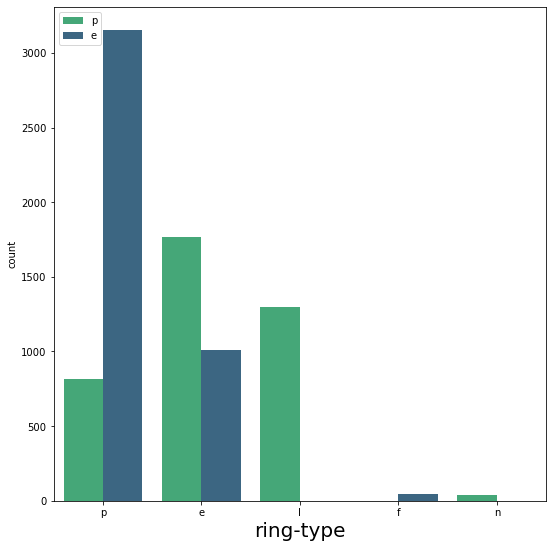

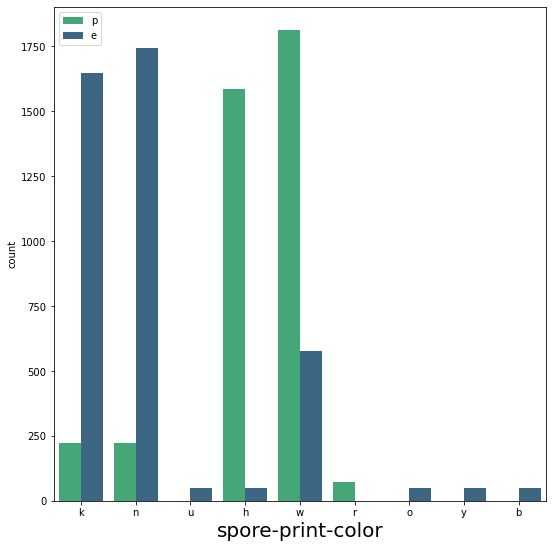

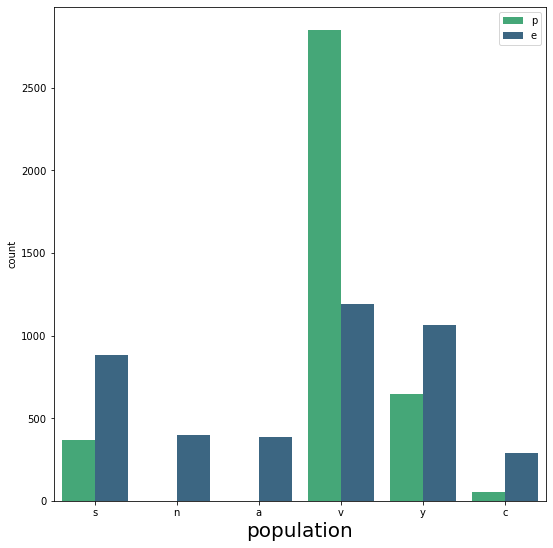

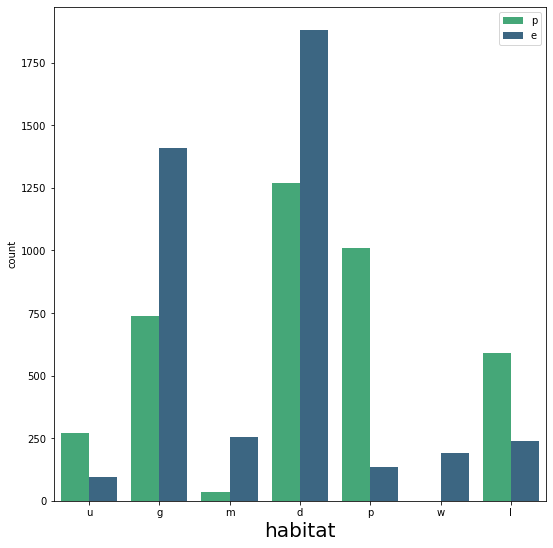

In [6]:
df_cols = df.columns.to_list()

for col in df_cols[1:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col, hue='class', data=df, palette='viridis_r')
    plt.xlabel(col, fontsize=20)
    plt.legend(loc='best')

# Modelling

In [7]:
X = df.drop('class', axis=1)
y = df['class']

display(X.head())
display(y.head())

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g


0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [8]:
le = LabelEncoder()

X = X.apply(le.fit_transform)
y = le.fit_transform(y)

display(X.head())
display(y)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


array([1, 0, 0, ..., 0, 1, 0])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2031, 21)
(6093, 21)
(2031,)
(6093,)


In [10]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 1. Logistic Regression

In [11]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
lr_pred = lr.predict(X_test)

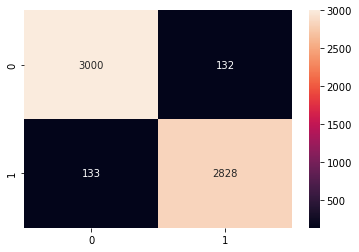

In [13]:
cm_log = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_log, annot=True, fmt='d');

In [14]:
acc_lr = accuracy_score(y_test, lr_pred)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3132
           1       0.96      0.96      0.96      2961

    accuracy                           0.96      6093
   macro avg       0.96      0.96      0.96      6093
weighted avg       0.96      0.96      0.96      6093



### 2. Decision Tree

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
dt_pred = dt.predict(X_test)

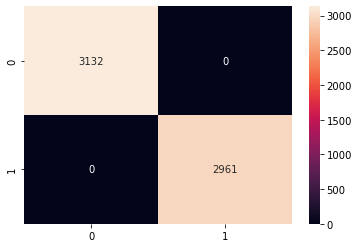

In [17]:
cm_dt = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm_dt, annot=True, fmt='d');

In [18]:
acc_dt = accuracy_score(y_test, dt_pred)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3132
           1       1.00      1.00      1.00      2961

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093



### 3. Random Forest

In [19]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
rf_pred = rf.predict(X_test)

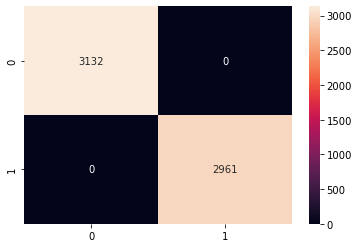

In [21]:
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d');

In [22]:
acc_rf = accuracy_score(y_test, rf_pred)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3132
           1       1.00      1.00      1.00      2961

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093



### 4. XGBoost

In [23]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [24]:
xgb_pred = xgb.predict(X_test)

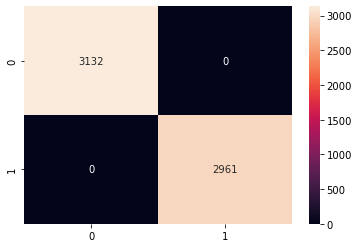

In [25]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d');

In [26]:
acc_xgb = accuracy_score(y_test, xgb_pred)
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3132
           1       1.00      1.00      1.00      2961

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093



# Comparing all accuracies

In [27]:
data = {'LogisticRegression':acc_lr,
        'DecisionTree':acc_dt,
        'RandomForest':acc_rf,
        'XGBoost':acc_xgb}
methods = list(data.keys())
scores = list(data.values())

C:\Users\Nikhil Hariharan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


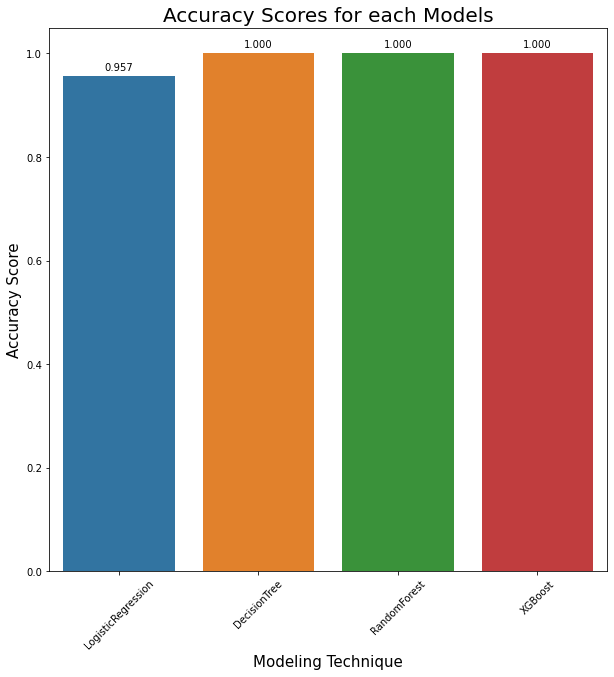

In [28]:
plt.figure(figsize=(10,10))
splot = sns.barplot(methods, scores)
for p in splot.patches:
    splot.annotate(format(p.get_height(),'.3f'), (p.get_x()+p.get_width()/2., p.get_height()),
                   ha='center', va='center', xytext=(0,9), textcoords='offset points')    
plt.xticks(rotation = 45)
plt.xlabel('Modeling Technique', fontsize=15)
plt.ylabel('Accuracy Score', fontsize=15)
plt.title('Accuracy Scores for each Models', fontsize=20);